## Cat and dog identification

- Data preprocessing: image data processing, preparing training and validation data sets
- Convolutional network model: building network architecture
- Over-fitting: observe the training and verification effects, and propose solutions to the over-fitting problem
- Data enhancement: Image data enhancement methods and effects
- Transfer learning: essential training strategy for deep learning

<img src="./img/1.png" alt="FAO" width="990">

### Import toolkit



In [3]:
import os
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Specify the data path (training and validation)

In [4]:
# The folder where the data is located
base_dir = '/Users/janleung/猫狗识别/data/cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Training set
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Validation set
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### Build a convolutional neural network model

In [5]:
model = tf.keras.models.Sequential([
    #If training is slow, you can set the data to be smaller
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
   #Prepare for fully connected layer
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
   # Two classification sigmoid is enough
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

Configure the trainer

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

### Data preprocessing

- The data read in will be automatically converted into tensor (float32) format and prepared for training and verification respectively.
- Image data normalization (0-1) interval

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(64, 64),  #resize
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Train network model

In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 9s - loss: 0.6909 - acc: 0.5240 - val_loss: 0.6952 - val_acc: 0.5000
Epoch 2/20
100/100 - 9s - loss: 0.6645 - acc: 0.5960 - val_loss: 0.6906 - val_acc: 0.5360
Epoch 3/20
100/100 - 9s - loss: 0.6279 - acc: 0.6410 - val_loss: 0.6533 - val_acc: 0.6260
Epoch 4/20
100/100 - 9s - loss: 0.5740 - acc: 0.6850 - val_loss: 0.6046 - val_acc: 0.6830
Epoch 5/20
100/100 - 9s - loss: 0.5365 - acc: 0.7360 - val_loss: 0.5944 - val_acc: 0.6730
Epoch 6/20
100/100 - 9s - loss: 0.5072 - acc: 0.7620 - val_loss: 0.5837 - val_acc: 0.6820
Epoch 7/20
100/100 - 9s - loss: 0.4946 - acc: 0.7625 - val_loss: 0.5588 - val_acc: 0.7170
Epoch 8/20
100/100 - 9s - loss: 0.4454 - acc: 0.8030 - val_loss: 0.5718 - val_acc: 0.6980
Epoch 9/20
100/100 - 9s - loss: 0.4273 - acc: 0.8070 - val_loss: 0.5946 - val_acc: 0.6910
Epoch 10/20
100/100 - 9s - loss: 0.3922 - acc: 0.8295 - val_loss: 0.5526 - val_acc: 0.7380
Epoch 11/20
100/100 - 9s - loss: 0.3689 - acc: 0.8470 - val_loss: 0.5723 - val_acc: 0.7180
Epoch 12

### Show results

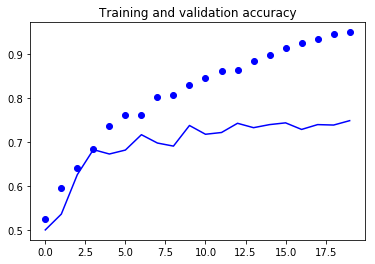

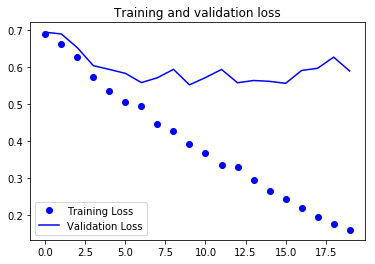

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()